In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Walmart_Store_sales.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data_desc = data.describe()

In [7]:
data_desc

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
data_desc.transpose()

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data["Date"] = pd.to_datetime(data["Date"])

In [11]:
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [12]:
sales_per_month = data.groupby("Month")["Weekly_Sales"].sum().sort_values()
sales_per_month = np.array(sales_per_month)

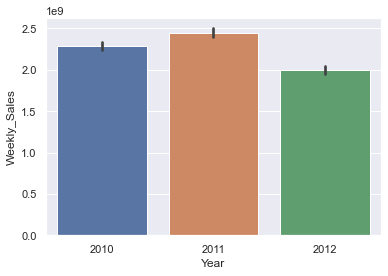

In [13]:
sns.barplot(x="Year", y="Weekly_Sales", data=data, estimator=sum);

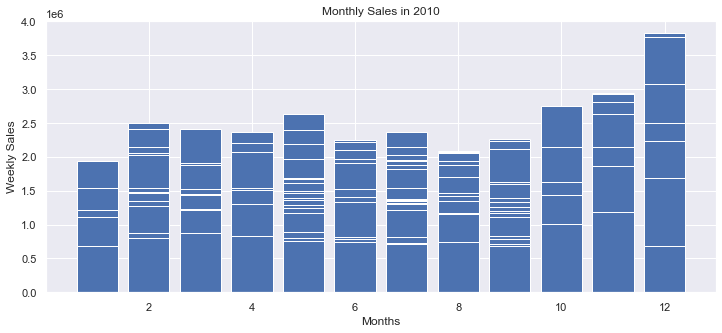

In [14]:
plt.figure(figsize=(12, 5))
plt.bar(data[data.Year==2010]["Month"], data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly Sales in 2010")
plt.show()

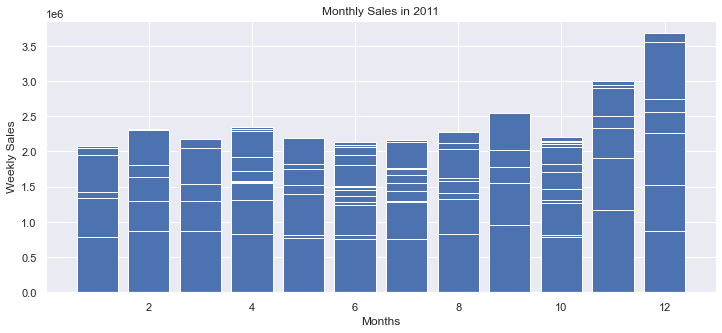

In [15]:
plt.figure(figsize=(12, 5))
plt.bar(data[data.Year==2011]["Month"], data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly Sales in 2011")
plt.show()

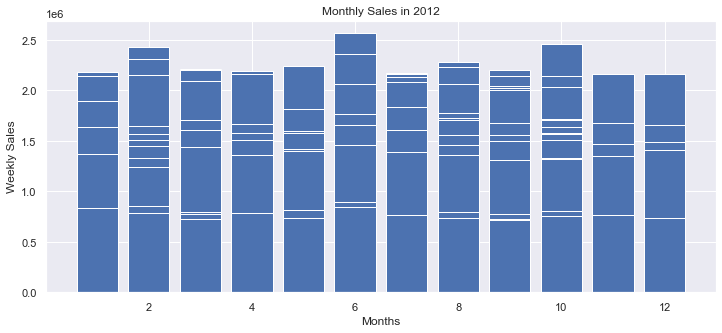

In [16]:
plt.figure(figsize=(12, 5))
plt.bar(data[data.Year==2012]["Month"], data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly Sales in 2012")
plt.show()

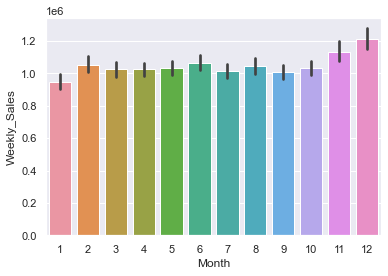

In [ ]:
sns.barplot(x="Month", y="Weekly_Sales", data=data);

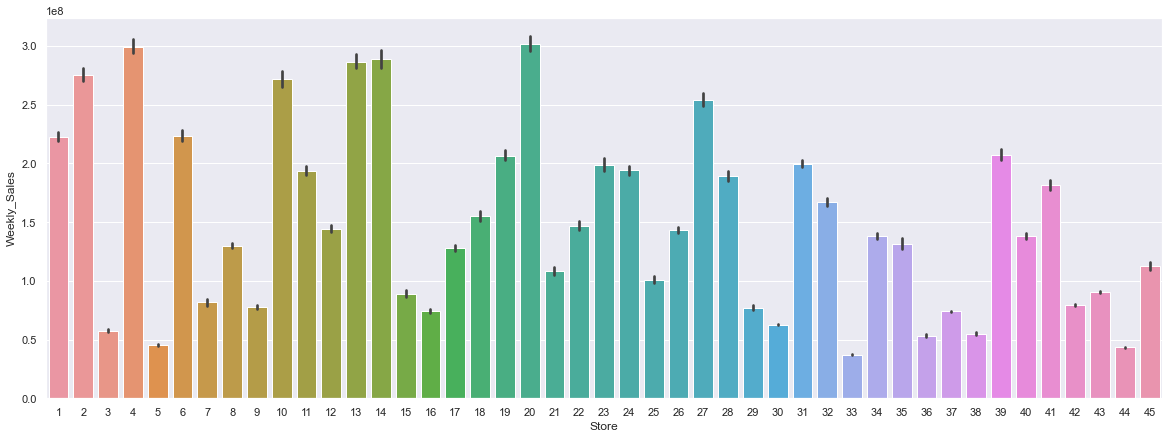

In [18]:
plt.figure(figsize=(20, 7))
sns.barplot(x="Store", y="Weekly_Sales", data=data, estimator=sum);

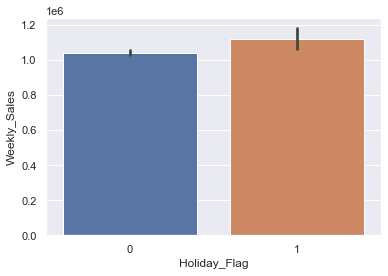

In [19]:
sns.barplot(x="Holiday_Flag", y="Weekly_Sales", data=data);

In [20]:
super_bowl = ["12-2-2010", "11-2-2011", "10-2-2012"]
labour_day = ["10-9-2010", "9-9-2011", "7-9-2012"]
thanksgiving = ["26-11-2010", "25-11-2011", "23-11-2012"]
christmas = ["31-12-2010", "30-12-2011", "28-12-2012"]

In [21]:
non_holiday_sales = data[data["Holiday_Flag"] == 0]["Weekly_Sales"].mean()

super_bowl_sales = (pd.DataFrame(data.loc[data.Date.isin(super_bowl)]))["Weekly_Sales"].mean()
labour_day_sales = (pd.DataFrame(data.loc[data.Date.isin(labour_day)]))["Weekly_Sales"].mean()
thanksgiving_sales = (pd.DataFrame(data.loc[data.Date.isin(thanksgiving)]))["Weekly_Sales"].mean()
christmas_sales = (pd.DataFrame(data.loc[data.Date.isin(christmas)]))["Weekly_Sales"].mean()

non_holiday_sales, super_bowl_sales, labour_day_sales, thanksgiving_sales, christmas_sales

(1041256.3802088564,
 1079127.9877037033,
 1042427.2939259257,
 1471273.427777778,
 960833.1115555551)

In [22]:
type_of_holiday = ("non_holiday_sales", "super_bowl_sales", "labour_day_sales", "thanksgiving_sales", "christmas_sales")
mean_sales_holiday = (1041256.3802088564, 1079127.9877037033, 1042427.2939259257, 1471273.427777778, 960833.115555551)

df_holiday_sales = pd.DataFrame({
    "type_of_holiday": type_of_holiday, 
    "mean_sales_holiday": mean_sales_holiday
})
df_holiday_sales

,type_of_holiday,mean_sales_holiday
0,non_holiday_sales,1.041256e+06
1,super_bowl_sales,1.079128e+06
2,labour_day_sales,1.042427e+06
3,thanksgiving_sales,1.471273e+06
4,christmas_sales,9.608331e+05


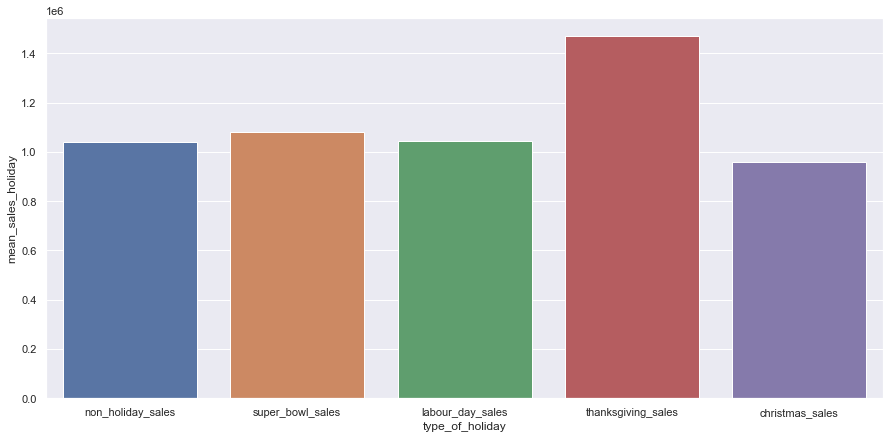

In [23]:
plt.figure(figsize=(15, 7))
sns.barplot(x="type_of_holiday", y="mean_sales_holiday", data=df_holiday_sales);

In [24]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [25]:
pivot_unemployment = data.pivot_table(index="Month", columns="Store", values="Unemployment")

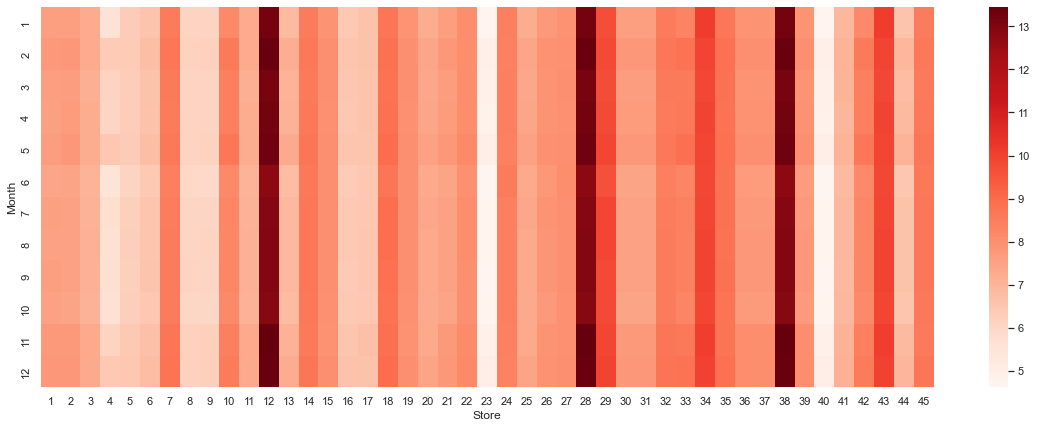

In [26]:
plt.figure(figsize=(20, 7))
sns.heatmap(pivot_unemployment, cmap="Reds");

In [27]:
pivot_cpi = data.pivot_table(index="Month", columns="Store", values="CPI")

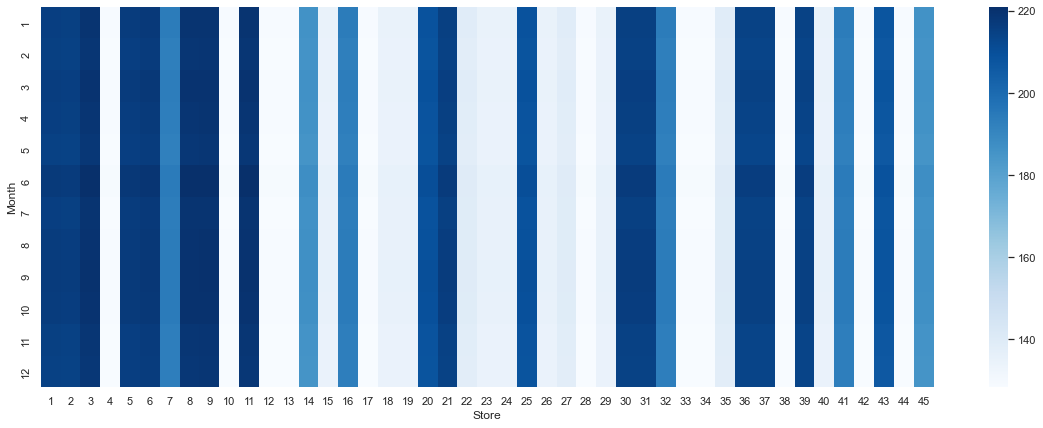

In [28]:
plt.figure(figsize=(20, 7))
sns.heatmap(pivot_cpi, cmap="Blues");

In [ ]:
sns.scatter(pivot_cpi, cmap="Blues");